In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 87.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 22.6MB/s]


In [4]:
data = pd.read_csv('./train.csv')
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.info()#Видно, что totalspent это строка, тут что-то не так 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
#и по всей видимости там не только вещественные числа, но и какой-то мусор 
f = ''
for a in data['TotalSpent'].unique():
  try:
    float(a)
  except:
    print("val error-",a,"-")
    f = a #тк такая хрень одна, одной переменной и хватит(эксперементально вывел)

val error-   -


In [7]:
data = data.drop(data[data['TotalSpent'] == f].index)  #тут строк не так много можно просто удалить и не париться
data['TotalSpent'] = data['TotalSpent'].apply(np.float)

<ipython-input-7-db266aafbc06>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['TotalSpent'] = data['TotalSpent'].apply(np.float)


In [8]:
#проверим категориальные признаки на присунтсвие мусора 
for a in feature_cols:
  print(data[a].unique())#те вроде все ок, среди уникальных значений нет мусора 

[55 72  1 32 60 25 27 50 16 70 69 26 38 30 52 71 59 61  7 20 48 22  2 21
 44 66 58 46 45  5  4  3 62  6 39 68 51 40 10 43 12 35 31 67  8 11 29 37
 33 14 15 47 23 65 13 41 53  9 64 42 34 17 18 63 56 54 24 28 49 19 57 36]
[ 19.5   25.85  75.9  ... 112.25 117.5   98.2 ]
[1026.35 1872.2    75.9  ...   55.05 2215.25 1375.6 ]
['Male' 'Female']
[0 1]
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes' 'No phone service']
['No' 'Fiber optic' 'DSL']
['No internet service' 'No' 'Yes']
['No internet service' 'No' 'Yes']
['No internet service' 'No' 'Yes']
['No internet service' 'Yes' 'No']
['No internet service' 'No' 'Yes']
['No internet service' 'No' 'Yes']
['One year' 'Two year' 'Month-to-month']
['No' 'Yes']
['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


Теперь посмотрим на картинки модные, красивые 

<ipython-input-10-1bc83457083c>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


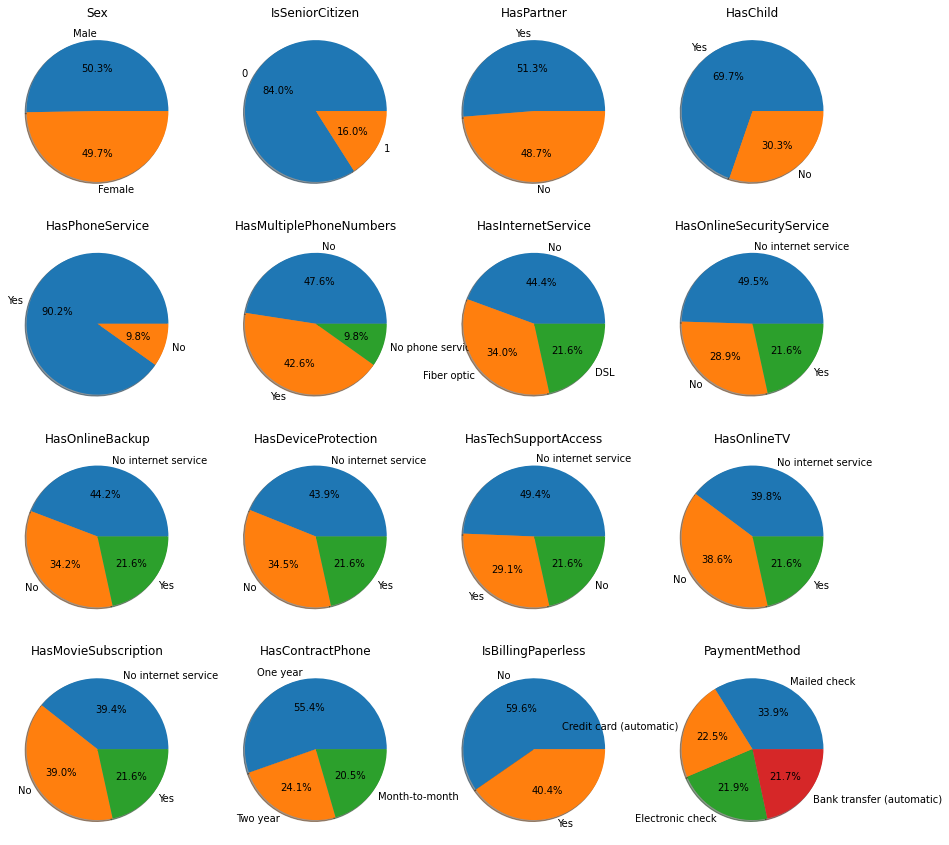

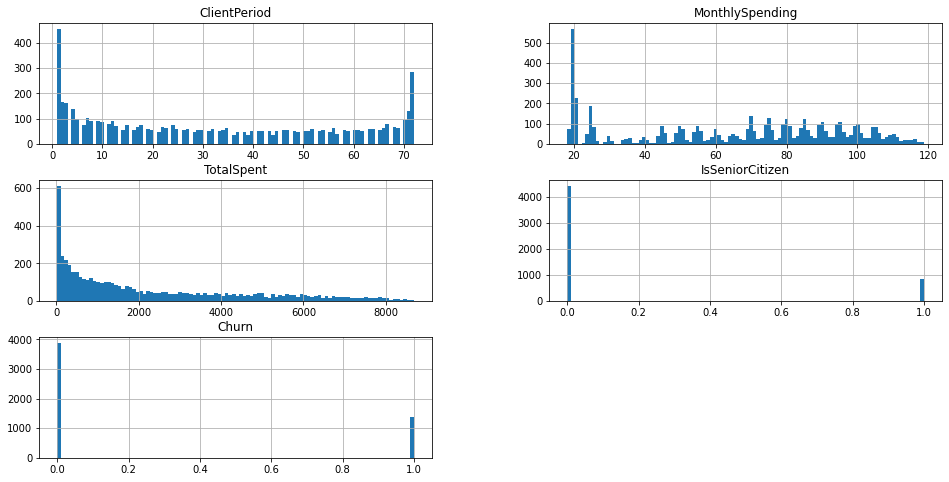

In [10]:
fig, ax = plt.subplots(4, 4)
for k,a in enumerate(cat_cols):
  ax[math.ceil(k//4),k%4].set_title(a)
  ax[math.ceil(k//4),k%4].pie(data[a].value_counts(),labels = data[a].unique(),autopct='%.1f%%', shadow=True)#тут делаются пирожки 

data.hist(figsize=(16.175,8),bins = 100)
fig.tight_layout()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

Опять же, в категориальных признаках все ок. Классы целевой переменной вполне сбалансированны, разница не огромная. Выбросы в числовых признаках походу есть, но что-то с ними делать я не собираюсь, все не так плохо

In [11]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [12]:
cat_data = data[cat_cols]
one_hot_data = pd.get_dummies(cat_data)
num_data = data[num_cols]


num_train, num_test,hot_train,hot_test, y_train, y_test = train_test_split(num_data,one_hot_data,data[target_col], random_state = 228,train_size=0.8)

scaler = StandardScaler()
num_train_sc = scaler.fit_transform(num_train)
num_test_sc = scaler.fit_transform(num_test)
# Чтобы не было лишних корреляций между тестовой и тренировочной выборкой 
features_data_train = pd.concat([pd.DataFrame(num_train), hot_train],axis = 'columns')
features_data_test = pd.concat([pd.DataFrame(num_test), hot_test],axis = 'columns')

features_data_train.columns = [str(t) for t in features_data_train.columns]
features_data_test.columns = [str(t) for t in features_data_test.columns]
#функции воняют на то, что названия колонок не одного типа

In [ ]:
lsp = np.linspace(0,20,40)
#обучаем
lcv = LogisticRegressionCV(Cs = lsp, cv = 5, penalty = 'l2', scoring = 'roc_auc', max_iter = 1000,n_jobs = -1 ,refit = True)
lcv.fit(features_data_train, y_train)
y_pred_train = lcv.predict_proba(features_data_train)
y_pred_test = lcv.predict_proba(features_data_test)

#там выдаются две вероятности, нам нужна вер класса 1
print(roc_auc_score(y_train,y_pred_train[:,1]), roc_auc_score(y_test, y_pred_test[:,1]))


0.8510459089359363 0.832744626846946


Норм, посмотрим что даст градиентый бустинг

In [15]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns = 'Churn'), data['Churn'], train_size=0.8)


catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=0,
)
params = {
"n_estimators": [100, 150, 200, 250, 300],
"learning_rate": [0.005, 0.01, 0.02, 0.05, 0.1, 0.2],
"subsample": [0.3, 0.5, 0.7],
}
catboost.grid_search(params, x_train, y_train, cv=5, plot=True, refit=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8258835	best: 0.8258835 (0)	total: 2.97s	remaining: 4m 24s
1:	loss: 0.8278775	best: 0.8278775 (1)	total: 5.34s	remaining: 3m 54s
2:	loss: 0.8339562	best: 0.8339562 (2)	total: 7.63s	remaining: 3m 41s
3:	loss: 0.8391256	best: 0.8391256 (3)	total: 10.1s	remaining: 3m 37s
4:	loss: 0.8355565	best: 0.8391256 (3)	total: 12.8s	remaining: 3m 37s
5:	loss: 0.8270255	best: 0.8391256 (3)	total: 15.9s	remaining: 3m 42s
6:	loss: 0.8281997	best: 0.8391256 (3)	total: 19.5s	remaining: 3m 51s
7:	loss: 0.8302439	best: 0.8391256 (3)	total: 23.4s	remaining: 3m 59s
8:	loss: 0.8356925	best: 0.8391256 (3)	total: 27s	remaining: 4m 3s
9:	loss: 0.8381591	best: 0.8391256 (3)	total: 30.6s	remaining: 4m 4s
10:	loss: 0.8327033	best: 0.8391256 (3)	total: 32.2s	remaining: 3m 51s
11:	loss: 0.8214766	best: 0.8391256 (3)	total: 33.9s	remaining: 3m 40s
12:	loss: 0.8297498	best: 0.8391256 (3)	total: 36s	remaining: 3m 33s
13:	loss: 0.8332761	best: 0.8391256 (3)	total: 39.3s	remaining: 3m 33s
14:	loss: 0.8370242	be

In [18]:
print('Best score:', end=' ')
print(catboost.best_score_)
best_params = catboost.get_params()
for i in ('cat_features', 'logging_level', 'eval_metric'):
  best_params.pop(i)
print('Best params:', end=' ')
print(best_params)

Best score: {'learn': {'Logloss': 0.39886878368466683, 'AUC': 0.8632359051301287}}
Best params: {'random_seed': 0, 'metric_period': 1000, 'grow_policy': 'Lossguide', 'iterations': 100, 'subsample': 0.3, 'learning_rate': 0.05}
